In [1]:
import os
import sys
import numpy as np
import time
import scipy
import matplotlib.pyplot as plt
import time

In [10]:
# import the frank2d directory
current_dir =  os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(parent_dir)

#frank2d
from frank2d import Frank2D 
from constants import rad_to_arcsec
from plot import Plot
from fit import ConjugateGradientMethod

from frank.geometry import SourceGeometry

In [4]:
 def apply_correction(self, u, v, V, use3D=False):
        r"""
        Correct the phase centre and deproject the visibilities

        Parameters
        ----------
        u : array of real, size = N, unit = :math:`\lambda`
            u-points of the visibilities
        v : array of real, size = N, unit = :math:`\lambda`
            v-points of the visibilities
        V : array of real, size = N, units = Jy
            Complex visibilites
        use3D : bool, default=False
            If True, also return the 3rd compoent of the
            de-projected visibilities, wp.

        Returns
        -------
        up : array of real, size = N, unit = :math:`\lambda`
            Corrected u-points of the visibilities
        vp : array of real, size = N, unit = :math:`\lambda`
            Corrected v-points of the visibilities
        wp : array of real, size = N, unit = :math:`\lambda`
            [Optional] Corrected w-points of the visibilities
        Vp : array of real, size = N, unit = Jy
            Corrected complex visibilites

        """
        Vp = apply_phase_shift(u, v, V, self._dRA, self._dDec, inverse=True)
        up, vp, wp = deproject(u, v, self._inc, self._PA)

        if use3D:
            return up, vp, wp, Vp
        else:
            return up, vp, Vp

In [5]:
# Huang 2018 
inc = 34.97
pa = 85.76
dra = 1.9e-3
ddec = -2.5e-3
Rout = 1.9 #arcsecs

# UVtable
dir = "../../../data/"
data_file = dir +'AS209_continuum_prom_1chan_30s_keepflagsFalse.txt'

 # load data||
u, v, Re, Imag, Weights = np.loadtxt(data_file, unpack = True)
Vis = Re + Imag*1j

In [11]:
geom = SourceGeometry(inc= inc, PA= pa, dRA= dra, dDec= ddec)

In [12]:
u_deproj, v_deproj, vis_deproj = geom.apply_correction(u, v, Vis)

In [14]:
frank2d = Frank2D(100, Rout)
frank2d.fit(u_deproj, v_deproj, vis_deproj, Weights)

Gridding...


/Users/mariajmelladot/Desktop/Frank2D/6_Frank2D_Oficial/frank2d/preprocess_vis.py:45: RuntimeWarning: invalid value encountered in divide
  vis_gridded_matrix =  vis_weights_sum_bin/weights_sum_bin


  --> time = 0.00  min |  0.28 seconds
Setting kernel...
Setting fit method...
Fitting...
  *  Constructing linear operators...
     --> time = 0.21  min |  12.54 seconds
  *  Solving linear system...
atol:  0.0
rtol:  2052.00816272072
final atol:  2052.00816272072
maxiter:  100000
  --> CGM converged in  2  iterations
     --> time = 0.22  min |  13.16 seconds
  --> CGM converged?   True
  --> Fit correctly?   True
                                                 fit correctly       !!!!!!
Inverting...
  --> time = 0.00  min |  0.00 seconds


In [15]:
frank2d = Frank2D(200, Rout)
frank2d.fit(u_deproj, v_deproj, vis_deproj, Weights)

Gridding...
  --> time = 0.01  min |  0.32 seconds
Setting kernel...
Setting fit method...
Fitting...
  *  Constructing linear operators...
     --> time = 3.81  min |  228.31 seconds
  *  Solving linear system...
atol:  0.0
rtol:  2052.00816272072
final atol:  2052.00816272072
maxiter:  400000
  --> CGM converged in  2  iterations
     --> time = 4.07  min |  243.97 seconds
  --> CGM converged?   True
  --> Fit correctly?   True
                                                 fit correctly       !!!!!!
Inverting...
  --> time = 0.00  min |  0.00 seconds


In [17]:
frank2d = Frank2D(100, Rout)
frank2d.fit(u_deproj, v_deproj, vis_deproj, Weights, rtol=1e-8)

Gridding...
  --> time = 0.01  min |  0.32 seconds
Setting kernel...
Setting fit method...
Fitting...
  *  Constructing linear operators...
     --> time = 0.29  min |  17.35 seconds
  *  Solving linear system...
atol:  0.0
rtol:  205.20081627207205
final atol:  205.20081627207205
maxiter:  100000
  --> CGM converged in  2  iterations
     --> time = 0.18  min |  10.85 seconds
  --> CGM converged?   True
  --> Fit correctly?   True
                                                 fit correctly       !!!!!!
Inverting...
  --> time = 0.00  min |  0.00 seconds


In [18]:
frank2d = Frank2D(100, Rout)
frank2d.fit(u_deproj, v_deproj, vis_deproj, Weights, rtol=1e-9)

Gridding...
  --> time = 0.01  min |  0.30 seconds
Setting kernel...
Setting fit method...
Fitting...
  *  Constructing linear operators...
     --> time = 0.25  min |  14.88 seconds
  *  Solving linear system...
atol:  0.0
rtol:  20.520081627207205
final atol:  20.520081627207205
maxiter:  100000
  --> CGM converged in  2  iterations
     --> time = 0.24  min |  14.52 seconds
  --> CGM converged?   True
  --> Fit correctly?   True
                                                 fit correctly       !!!!!!
Inverting...
  --> time = 0.00  min |  0.00 seconds


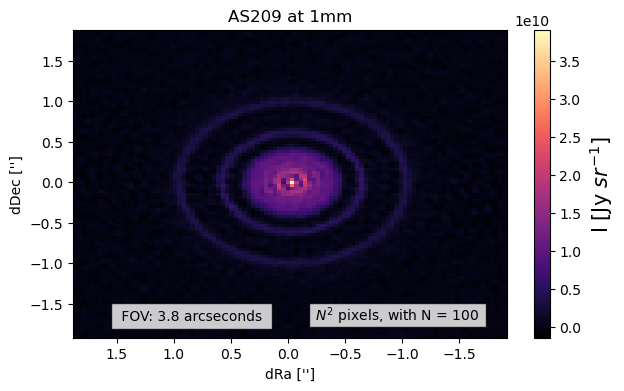

In [19]:
Plot(frank2d).get_image('AS209 at 1mm')